In [1]:
from hossam import load_data

In [2]:
origin = load_data("traffic_acc")
origin

[data] https://data.hossam.kr/data/lab04/traffic_acc.xlsx
[desc] 2025년 1월 부터 2018년 12월 까지 월별 교통사고의 발생건수,부상자수,사망자수 데이터(인덱스/메타데이터 없음, 출처: 공공데이터포털)
[!] Cannot read metadata


,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


In [3]:
origin.groupby('년도').sum()

,월,발생건수,사망자수,부상자수
년도,,,,
2005,78,214171,6376,342233
2006,78,213745,6327,340229
2007,78,211662,6166,335906
2008,78,215822,5870,338962
2009,78,231990,5838,361875
2010,78,226878,5505,352458
2011,78,221711,5229,341391
2012,78,223656,5392,344565
2013,78,215354,5092,328711


In [4]:
df = origin.drop(columns='월')
df

,년도,발생건수,사망자수,부상자수
0,2005,15494,504,25413
1,2005,13244,431,21635
2,2005,16580,477,25550
3,2005,17817,507,28131
4,2005,19085,571,29808
...,...,...,...,...
163,2018,18335,357,27749
164,2018,18371,348,27751
165,2018,19738,373,28836
166,2018,19029,298,28000


In [5]:
df.groupby('년도').sum()

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


In [6]:
df = df.filter(['년도', '사망자수'])
df

,년도,사망자수
0,2005,504
1,2005,431
2,2005,477
3,2005,507
4,2005,571
...,...,...
163,2018,357
164,2018,348
165,2018,373
166,2018,298


In [7]:
df.groupby('년도').sum()

,사망자수
년도,
2005,6376
2006,6327
2007,6166
2008,5870
2009,5838
2010,5505
2011,5229
2012,5392
2013,5092


In [8]:
origin.groupby(['년도','월']).mean()

발생건수   사망자수     부상자수
년도   월                          
2005 1   15494.0  504.0  25413.0
     2   13244.0  431.0  21635.0
     3   16580.0  477.0  25550.0
     4   17817.0  507.0  28131.0
     5   19085.0  571.0  29808.0
...          ...    ...      ...
2018 8   18335.0  357.0  27749.0
     9   18371.0  348.0  27751.0
     10  19738.0  373.0  28836.0
     11  19029.0  298.0  28000.0
     12  18010.0  323.0  26463.0

[168 rows x 3 columns]

In [9]:
origin.drop("월", axis=1).groupby('년도').agg(
    {"발생건수":['mean','sum'], '사망자수':'max',
        '부상자수':'min'
    }
)


발생건수         사망자수   부상자수
              mean     sum  max    min
년도                                    
2005  17847.583333  214171  639  21635
2006  17812.083333  213745  701  22903
2007  17638.500000  211662  582  23717
2008  17985.166667  215822  574  23282
2009  19332.500000  231990  592  24429
2010  18906.500000  226878  619  24968
2011  18475.916667  221711  520  22493
2012  18638.000000  223656  533  25998
2013  17946.166667  215354  499  22255
2014  18629.333333  223552  476  21501
2015  19336.250000  232035  470  22999
2016  18409.750000  220917  440  24021
2017  18027.916667  216335  420  22323
2018  18095.666667  217148  373  24630

In [10]:
def myFunction(x):
    # x는 Series 객체 - 컬럼 하나가 통째로 전달됨.
    return x.max() - x.min()

#사용자 정의 함수 이름은 문자열이 아님
origin.drop('월',axis=1).groupby('년도').agg(['max','min',myFunction])

발생건수                   사망자수                   부상자수                  
        max    min myFunction  max  min myFunction    max    min myFunction
년도                                                                         
2005  19757  13244       6513  639  431        208  31603  21635       9968
2006  19877  14270       5607  701  373        328  31270  22903       8367
2007  19264  14696       4568  582  446        136  30532  23717       6815
2008  19926  14176       5750  574  423        151  30935  23282       7653
2009  21440  15502       5938  592  405        187  33255  24429       8826
2010  21575  15803       5772  619  395        224  33282  24968       8314
2011  20952  14208       6744  520  338        182  32133  22493       9640
2012  19750  16656       3094  533  393        140  30163  25998       4165
2013  19797  14187       5610  499  335        164  29676  22255       7421
2014  20760  14061       6699  476  325        151  31199  21501       9698
2015  21587  14939       6648  470  296        174  32436  22999       9437
2016  19918  15664       4254  440  292        148  29635  24021       5614
2017  19891  14832       5059  420  280        140  29371  22323       7048
2018  19738  16208       3530  373  266        107  28836  24630       4206

In [11]:
origin.drop('월',axis=1).groupby('년도').agg(
    ['max', 'min', lambda x:x.max() -x.min()]
)

발생건수                   사망자수                   부상자수                  
        max    min <lambda_0>  max  min <lambda_0>    max    min <lambda_0>
년도                                                                         
2005  19757  13244       6513  639  431        208  31603  21635       9968
2006  19877  14270       5607  701  373        328  31270  22903       8367
2007  19264  14696       4568  582  446        136  30532  23717       6815
2008  19926  14176       5750  574  423        151  30935  23282       7653
2009  21440  15502       5938  592  405        187  33255  24429       8826
2010  21575  15803       5772  619  395        224  33282  24968       8314
2011  20952  14208       6744  520  338        182  32133  22493       9640
2012  19750  16656       3094  533  393        140  30163  25998       4165
2013  19797  14187       5610  499  335        164  29676  22255       7421
2014  20760  14061       6699  476  325        151  31199  21501       9698
2015  21587  14939       6648  470  296        174  32436  22999       9437
2016  19918  15664       4254  440  292        148  29635  24021       5614
2017  19891  14832       5059  420  280        140  29371  22323       7048
2018  19738  16208       3530  373  266        107  28836  24630       4206

In [14]:
origin.drop('월',axis=1).groupby('년도', as_index=False).sum()

,년도,발생건수,사망자수,부상자수
0,2005,214171,6376,342233
1,2006,213745,6327,340229
2,2007,211662,6166,335906
3,2008,215822,5870,338962
4,2009,231990,5838,361875
5,2010,226878,5505,352458
6,2011,221711,5229,341391
7,2012,223656,5392,344565
8,2013,215354,5092,328711
9,2014,223552,4762,337497


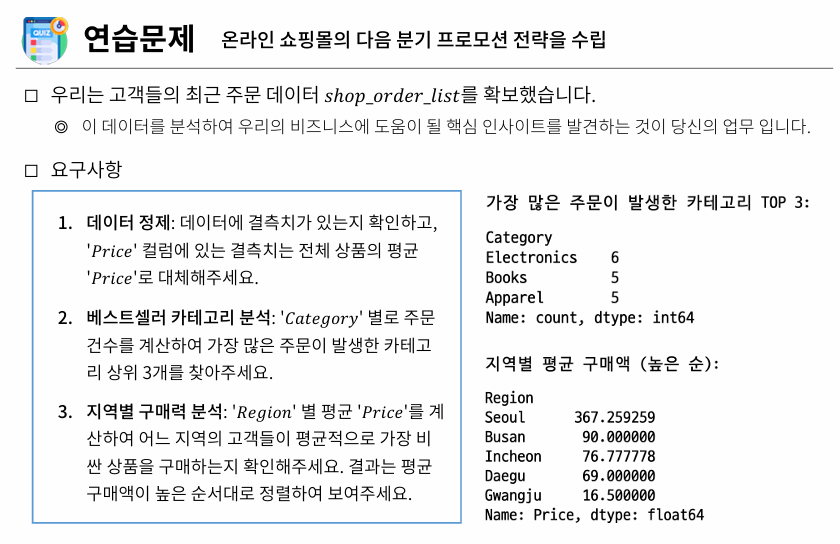

In [5]:
from hossam import load_data
origin = load_data('shop_order_list')
origin.head()

[data] https://data.hossam.kr/data/lab04/shop_order_list.xlsx
[desc] 온라인 쇼핑몰의 최근 고객 주문 데이터
[!] Cannot read metadata


,UserID,Product,Price,Category,Region,OrderDate
OrderID,,,,,,
1001,user001,Laptop,1200.0,Electronics,Seoul,2023-01-15
1002,user002,Mouse,25.0,Electronics,Busan,2023-01-16
1003,user003,Keyboard,70.0,Electronics,Seoul,2023-01-17
1004,user001,Book,15.0,Books,Incheon,2023-01-18
1005,user004,T-shirt,30.0,Apparel,Gwangju,2023-01-19


In [6]:
from sklearn.impute import SimpleImputer
import numpy as np
결측치확인 = origin.copy()  
# 결측치확인.isnull().sum()
#Price 컬럼의 결측치 행 확인
결측치행 = 결측치확인[결측치확인['Price'].isnull()]
결측치행


,UserID,Product,Price,Category,Region,OrderDate
OrderID,,,,,,
1011,user003,Webcam,NaN,Electronics,Incheon,2023-03-25
1018,user004,Chair,NaN,Furniture,Seoul,2023-04-12


In [7]:
imr = SimpleImputer(missing_values = np.nan, strategy='mean')
df_imr = imr.fit_transform(결측치확인[['Price']])
결측치확인['Price'] = df_imr
결측치확인.isnull().sum()
결측치확인

,UserID,Product,Price,Category,Region,OrderDate
OrderID,,,,,,
1001,user001,Laptop,1200.000000,Electronics,Seoul,2023-01-15
1002,user002,Mouse,25.000000,Electronics,Busan,2023-01-16
1003,user003,Keyboard,70.000000,Electronics,Seoul,2023-01-17
1004,user001,Book,15.000000,Books,Incheon,2023-01-18
1005,user004,T-shirt,30.000000,Apparel,Gwangju,2023-01-19
1006,user002,Book,20.000000,Books,Seoul,2023-01-20
1007,user005,Jeans,80.000000,Apparel,Busan,2023-02-21
1008,user001,Monitor,300.000000,Electronics,Seoul,2023-02-22
1009,user006,Book,18.000000,Books,Daegu,2023-02-23


In [8]:
# df = 결측치확인.drop(columns='OrderDate')
# df = df.filter(['년도', '사망자수'])
# 결측치확인.groupby('Category').sum()
price_mean = 결측치확인['Price'].mean()
결측치확인['Price'] = 결측치확인['Price'].fillna(price_mean)
결측치확인

,UserID,Product,Price,Category,Region,OrderDate
OrderID,,,,,,
1001,user001,Laptop,1200.000000,Electronics,Seoul,2023-01-15
1002,user002,Mouse,25.000000,Electronics,Busan,2023-01-16
1003,user003,Keyboard,70.000000,Electronics,Seoul,2023-01-17
1004,user001,Book,15.000000,Books,Incheon,2023-01-18
1005,user004,T-shirt,30.000000,Apparel,Gwangju,2023-01-19
1006,user002,Book,20.000000,Books,Seoul,2023-01-20
1007,user005,Jeans,80.000000,Apparel,Busan,2023-02-21
1008,user001,Monitor,300.000000,Electronics,Seoul,2023-02-22
1009,user006,Book,18.000000,Books,Daegu,2023-02-23


In [9]:
결측치확인['Category'].value_counts().head(3)

Category
Electronics    6
Books          5
Apparel        5
Name: count, dtype: int64

In [10]:
df3 = 결측치확인.filter(['Region','Price']).groupby('Region').mean()

In [11]:
df3.sort_values(by='Price', ascending=False)

,Price
Region,
Seoul,367.259259
Busan,90.000000
Incheon,76.777778
Daegu,69.000000
Gwangju,16.500000
